In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

# Define the problem

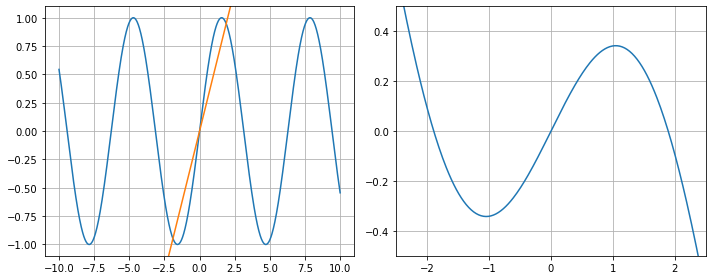

In [2]:
x = np.linspace(-10, 10, 1000)
y = np.sin(x)
α = 0.5
f = lambda x: np.sin(x) - α*x

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.plot(x, y)
plt.plot(x, α*x)
plt.ylim(-1.1, +1.1)
plt.grid()

plt.subplot(122)
plt.plot(x, f(x))
plt.ylim(-0.5, 0.5)
plt.xlim(-2.5, 2.5)
plt.grid()

plt.tight_layout()
plt.show()

# The bisection method

In [9]:
def bisect(a, b, f, eps=1e-6, maxsteps=1000):
    '''
    Solves f(x)=x for x using the bisection method.
    
    INPUT:
        a,b: interval a<x<b to search the root
        f: callable function f(x)
        eps: required precision for the interval [default 1e-6]
        maxsteps: maximum number of bisections [default 1000]
        
    OUTPUT:
        tuple: root, estimate of error, number of steps
        
    '''
    if (f(a)*f(b) > 0) or (b <= a):
        raise Exception('Bad interval.')
    
    n = 0
    while (b-a > eps) and (n < maxsteps):
        n += 1
        c = (a+b)/2
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
    
    return (c, b-a, n)

In [10]:
root = bisect(0.1, 5, f)
print('My implementation:', root)

# compare with scipy
root2 = optimize.bisect(f, 0.1, 5)
print('From scipy:', root2)

My implementation: (1.8954937815666197, 5.84125518843237e-07, 23)
From scipy: 1.895494267034724


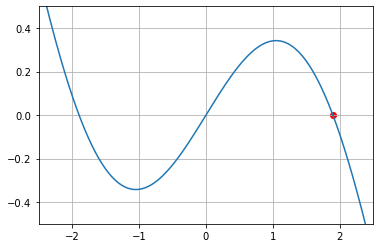

In [11]:
plt.plot(x, f(x))
plt.scatter(root[0], f(root[0]), c='red')
plt.ylim(-0.5, 0.5)
plt.xlim(-2.5, 2.5)
plt.grid()
plt.show()

# The Secant method

In [12]:
def secant(a, b, f, eps=1e-6, maxsteps=1000):
    '''
    Solves f(x)=0 for x using the secant method.
    
    INPUT:
        a,b: initial guesses for x near the desired root
        f: callable function f(x)
        eps: required precision for |f(x)|<eps
        maxsteps: maximum number of steps
    
    OUTPUT:
        tuple: root and number of steps
        
    '''
    n = 0
    while (np.abs(f(a)) > eps) and (n < maxsteps):
        n += 1
        # a = x(n), b = x(n-1), c = x(n+1)
        dfdx = (f(a) - f(b))/(a-b)
        c = a - f(a)/dfdx
        # update to next round
        b = a
        a = c
    
    return (a, n)

In [13]:
root = secant(2, 3, f)
print('My implementation:', root)

# compare with scipy
root2 = optimize.newton(f, 2)
print('From scipy:', root2)

My implementation: (1.8954943026363318, 4)
From scipy: 1.895494267033981


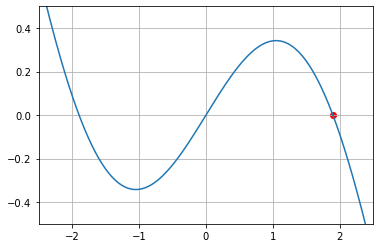

In [14]:
plt.plot(x, f(x))
plt.scatter(root[0], f(root[0]), c='red')
plt.ylim(-0.5, 0.5)
plt.xlim(-2.5, 2.5)
plt.grid()
plt.show()